### Problem definition  
The objective is to use the data to build the model that can predict the Energy Star Score and to interpret the results to find which factor influence the most  
The model we will use:
- Supervised: as we can access both features and target
- Regression: as the Enery Star Score is the continuous type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)
import warnings
warnings.filterwarnings('ignore')

#No WARNING ABOUT SETTING VALUE ON COPY OF SLICE
pd.options.mode.chained_assignment = None

#DISPLAY UP TO 60 COLUMNS IN THE DATAFRAME
pd.set_option('display.max_columns',60)

#SET DEFAULT FONT SIZE
plt.rcParams['font.size'] = 24

#INTERNAL IPYTHON TOOLS FOR SETTING FIGURE SIZE
from IPython.core.pylabtools import figsize

#IMPORT TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split


In [2]:
file = r'C:\Users\Nick Pham\Desktop\projects\Github - Master\Data-Science\Walk Though Machine Learning\Data\nyc_benchmarking_disclosure_2017_consumption_data.xlsx'
df = pd.read_excel(file, sheet_name = 'Information and Metrics')
print ('dataframe has been loaded')

dataframe has been loaded


In [3]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,10019,Not found,Not found,Manhattan,Not found,169416,Office,"Bank Branch, Office",Office,164754.0,Bank Branch,4662.0,NaN,NaN,1909,1,95,Whole Building,Whole Building,90.0,138.4,141.0,53.8,56.2,11.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1133475.1,NaN,NaN,1435754.7,16672.2,6551394.1,1920103.6,1920103.6,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,11373,Not found,Not found,Queens,Not found,94380,K-12 School,K-12 School,K-12 School,94380.0,NaN,NaN,NaN,NaN,1963,1,100,Whole Building,NaN,100.0,43.5,46.8,28.4,31.3,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2068300.1,23243.7,616343.7,180640.0,184131.9,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,10001-7507,Not found,Not found,Manhattan,Not found,125000,Hotel,Hotel,Hotel,125000.0,NaN,NaN,NaN,NaN,1999,1,85,Whole Building,Whole Building,83.0,271.1,274.7,130.2,133.7,18.8,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8245445.1,86776.9,8033914.4,2354605.3,2354605.3,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,10001,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,NaN,NaN,NaN,NaN,1994,1,100,Whole Building,NaN,27.0,163.0,167.9,76.5,80.8,11.7,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1848519.4,20520.9,1976691.9,579335.2,582516.1,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,10038,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,NaN,NaN,NaN,NaN,2012,1,0,Whole Building,Whole Building,99.0,64.2,64.2,20.5,20.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022951.6,299809.9,299809.9,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Order                                                       34355 non-null  int64         
 1   Property Id                                                 34355 non-null  int64         
 2   Property Name                                               34355 non-null  object        
 3   Parent Property Id                                          1723 non-null   object        
 4   Parent Property Name                                        1723 non-null   object        
 5   BBL - 10 digits                                             33625 non-null  float64       
 6   NYC Borough, Block and Lot (BBL) self-reported              33626 non-null  object        
 7   NYC Building Identific

---

## Missing values

### Create a table as a summary

In [5]:
miss_df = pd.DataFrame()

miss_values = df.isnull().sum()

miss_df['Number of Miss_Values'] = miss_values
miss_df['Percentage'] = 100*miss_values / len(df) 

#Sort the table into descending order to have an intuitive view
miss_df = miss_df.sort_values('Percentage', ascending = False).round(1)
miss_df

,Number of Miss_Values,Percentage
Propane Use (kBtu),34354,100.0
District Hot Water Use (kBtu),34347,100.0
District Chilled Water Use (kBtu),34325,99.9
Fuel Oil #1 Use (kBtu),34319,99.9
Diesel #2 Use (kBtu),34285,99.8
Address 2 (self-reported),33928,98.8
Fuel Oil #5 & 6 Use (kBtu),33871,98.6
District Steam Use (kBtu),32787,95.4
Parent Property Id,32632,95.0
Parent Property Name,32632,95.0


In [6]:
# Drop the columns which contain more than 70% of missing values
rows = miss_df[miss_df['Percentage']>70]
print(list(rows.index))
print(len(list(rows.index)))

['Propane Use (kBtu)', 'District Hot Water Use (kBtu)', 'District Chilled Water Use (kBtu)', 'Fuel Oil #1 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'Address 2 (self-reported)', 'Fuel Oil #5 & 6 Use (kBtu)', 'District Steam Use (kBtu)', 'Parent Property Id', 'Parent Property Name', 'Fuel Oil #4 Use (kBtu)', 'Annual Maximum Demand (MM/YYYY)', 'Annual Maximum Demand (kW)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', '3rd Largest Property Use Type', 'Fuel Oil #2 Use (kBtu)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)']
18


In [7]:
data = df.drop(columns = list(rows.index))
data.head()

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,1.010288e+09,1010287502,1024898,224 West 57th St,10019,Not found,Not found,Manhattan,Not found,169416,Office,"Bank Branch, Office",Office,164754.0,1909,1,95,Whole Building,Whole Building,90.0,138.4,141.0,53.8,56.2,11.3,0.1,1435754.7,16672.2,6551394.1,1920103.6,1920103.6,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,11373,Not found,Not found,Queens,Not found,94380,K-12 School,K-12 School,K-12 School,94380.0,1963,1,100,Whole Building,NaN,100.0,43.5,46.8,28.4,31.3,2.0,0.2,2068300.1,23243.7,616343.7,180640.0,184131.9,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,1.008290e+09,1-00829-0050,1080710,1170 Broadway,10001-7507,Not found,Not found,Manhattan,Not found,125000,Hotel,Hotel,Hotel,125000.0,1999,1,85,Whole Building,Whole Building,83.0,271.1,274.7,130.2,133.7,18.8,0.7,8245445.1,86776.9,8033914.4,2354605.3,2354605.3,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,1.008280e+09,1-00828-0053,1015657,1155 Broadway,10001,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,1994,1,100,Whole Building,NaN,27.0,163.0,167.9,76.5,80.8,11.7,0.4,1848519.4,20520.9,1976691.9,579335.2,582516.1,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,1.000650e+09,1-00065-0024,1001105,24 John Street,10038,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,2012,1,0,Whole Building,Whole Building,99.0,64.2,64.2,20.5,20.5,6.0,NaN,NaN,NaN,1022951.6,299809.9,299809.9,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


---

## Exploratory Data Analysis (EDA)
Theory: is the process where we plots and calculate statistic in order to explore the data. The purpose is to find anomalities, patterns, trends, or relationships (for examples, find correlation between 2 variables) or they can be used to decide which variables will be used
> We will start with Energy Star Score as this is our target , we will also change the name in "score" for easier applied

In [8]:
data = data.rename(columns = {'ENERGY STAR Score':'score'})
data.head()

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,1.010288e+09,1010287502,1024898,224 West 57th St,10019,Not found,Not found,Manhattan,Not found,169416,Office,"Bank Branch, Office",Office,164754.0,1909,1,95,Whole Building,Whole Building,90.0,138.4,141.0,53.8,56.2,11.3,0.1,1435754.7,16672.2,6551394.1,1920103.6,1920103.6,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,11373,Not found,Not found,Queens,Not found,94380,K-12 School,K-12 School,K-12 School,94380.0,1963,1,100,Whole Building,NaN,100.0,43.5,46.8,28.4,31.3,2.0,0.2,2068300.1,23243.7,616343.7,180640.0,184131.9,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,1.008290e+09,1-00829-0050,1080710,1170 Broadway,10001-7507,Not found,Not found,Manhattan,Not found,125000,Hotel,Hotel,Hotel,125000.0,1999,1,85,Whole Building,Whole Building,83.0,271.1,274.7,130.2,133.7,18.8,0.7,8245445.1,86776.9,8033914.4,2354605.3,2354605.3,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,1.008280e+09,1-00828-0053,1015657,1155 Broadway,10001,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,1994,1,100,Whole Building,NaN,27.0,163.0,167.9,76.5,80.8,11.7,0.4,1848519.4,20520.9,1976691.9,579335.2,582516.1,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,1.000650e+09,1-00065-0024,1001105,24 John Street,10038,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,2012,1,0,Whole Building,Whole Building,99.0,64.2,64.2,20.5,20.5,6.0,NaN,NaN,NaN,1022951.6,299809.9,299809.9,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


C:\Users\Nick Pham\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nick Pham\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


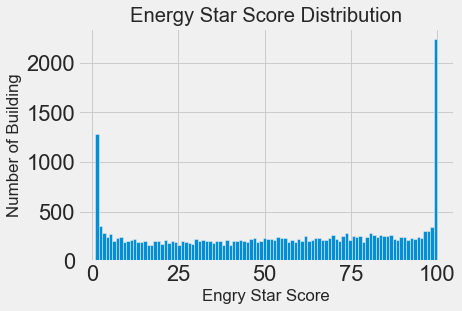

In [25]:
# Plot the distribution of score >>> histogram
plt.style.use('fivethirtyeight')
plt.hist(data['score'],bins = 100)
plt.xlabel('Engry Star Score')
plt.ylabel('Number of Building')
plt.title('Energy Star Score Distribution')
plt.show()

### Interpretation  
as we can see in the plot, the suspicious number of buildings with 100 scores that has so many. Which could be explained as the owners could have been report cheatly. Because the score based on the self-reported from the owners  

Now we plot the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building